In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf, adfuller

#References:
#https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
#https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')

nifty_data = pd.read_csv('./ml-project-data/NIFTY-50/2015.csv', header=0, 
                                                              parse_dates=[0], index_col=0, squeeze=True, 
                                                              date_parser=parser)
scaler = MinMaxScaler(feature_range=(-1, 1))
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)
nifty = scaler.fit_transform(nifty_data[['Average', 'Shares Traded', 'Turnover (Rs. Cr)']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [4]:
tcs_data = pd.read_csv('./ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv')
tcs = scaler.fit_transform(tcs_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [5]:
infy_data = pd.read_csv('./ml-project-data/INFY/01-01-2014-TO-31-12-2014INFYEQN.csv')
infy = scaler.fit_transform(infy_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [6]:
hcl_data = pd.read_csv('./ml-project-data/HCL/01-01-2014-TO-31-12-2014HCLTECHEQN.csv')
hcl = scaler.fit_transform(hcl_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
techm_data = pd.read_csv('./ml-project-data/TECHM/01-01-2014-TO-31-12-2014TECHMEQN.csv')
techm = scaler.fit_transform(techm_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
wipro_data = pd.read_csv('./ml-project-data/WIPRO/01-01-2014-TO-31-12-2014WIPROEQN.csv')
wipro = scaler.fit_transform(wipro_data[['Average Price', 'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty']])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


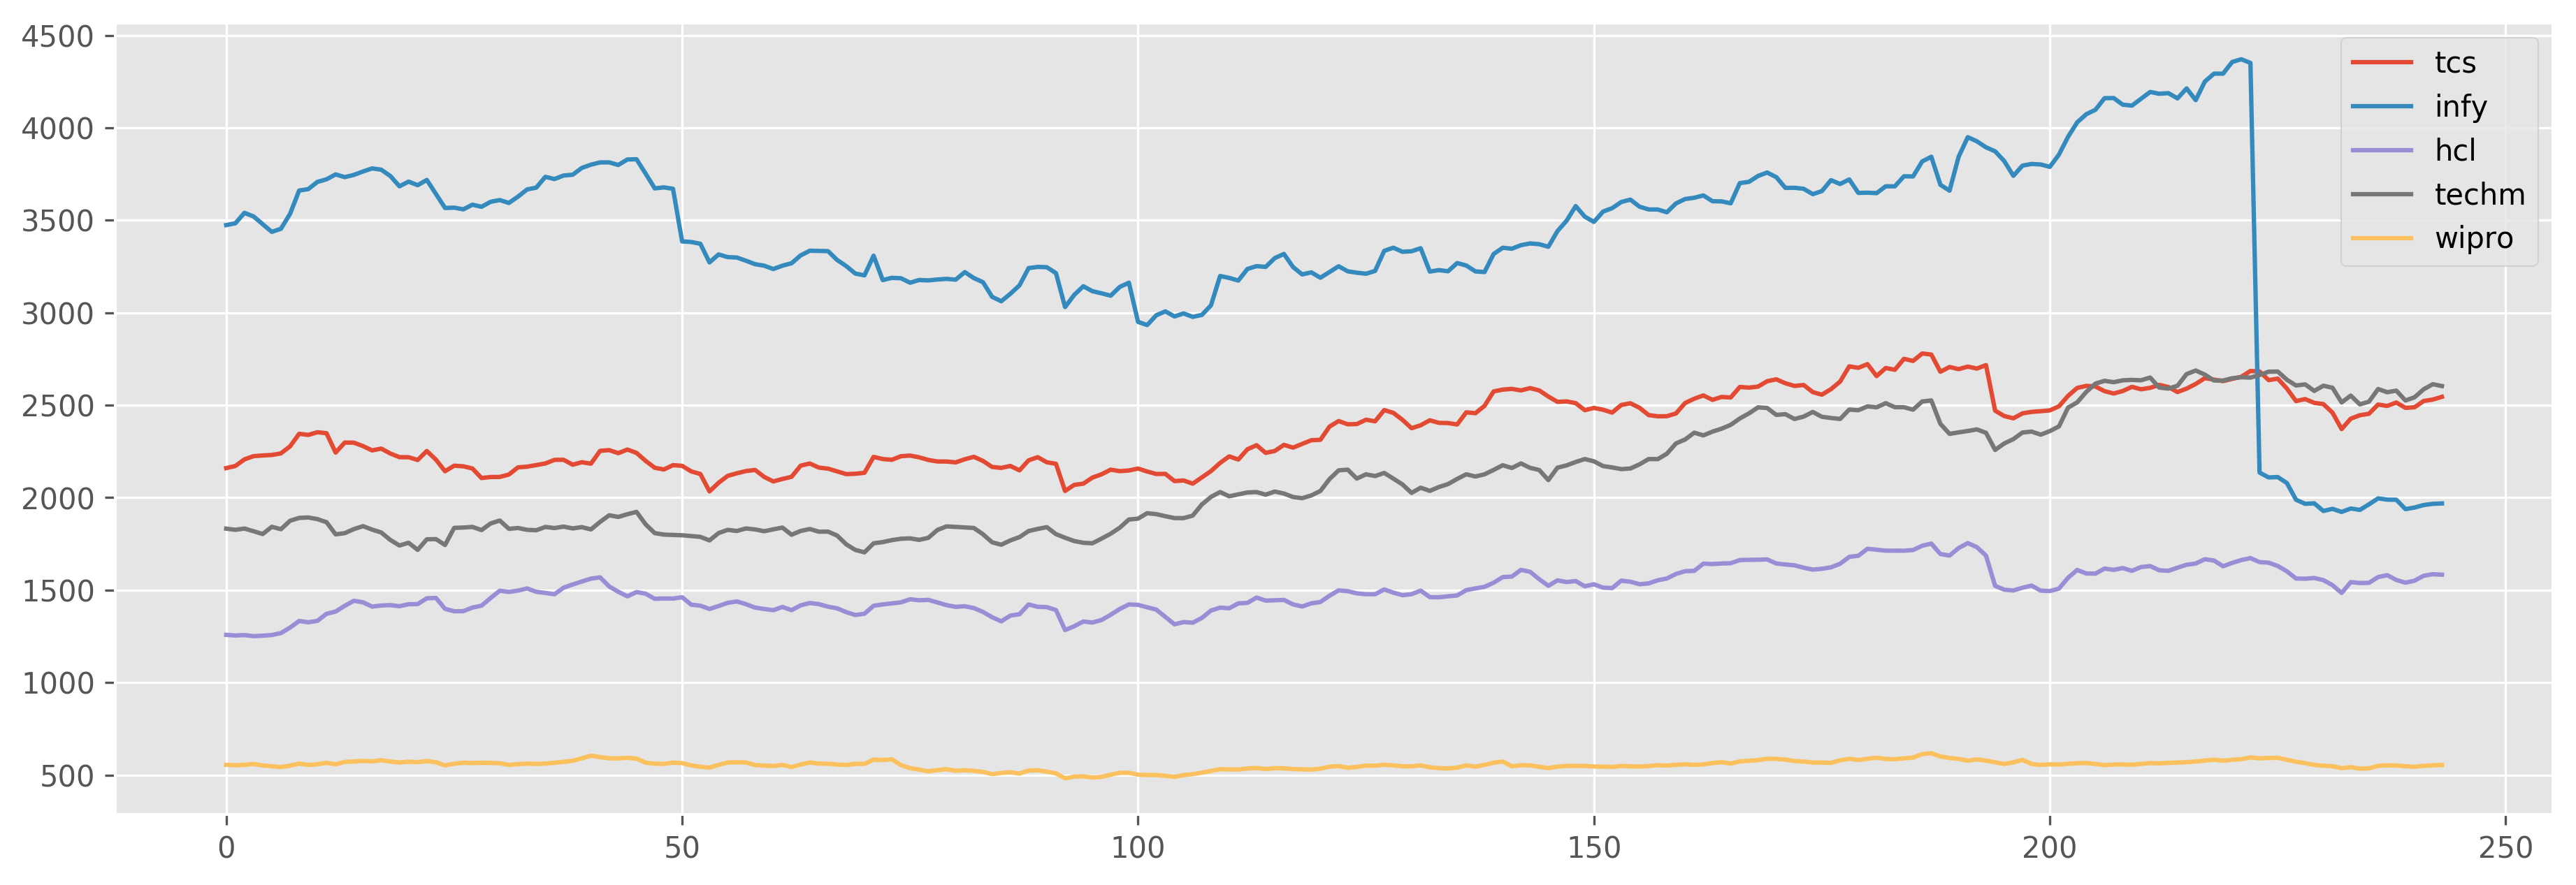

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
# plt.plot(nifty_data['Average'], label="nifty")
plt.plot(tcs_data['Average Price'], label="tcs")
plt.plot(infy_data['Average Price'], label="infy")
plt.plot(hcl_data['Average Price'], label="hcl")
plt.plot(techm_data['Average Price'], label="techm")
plt.plot(wipro_data['Average Price'], label="wipro")
plt.legend(loc='best')
plt.show()

In [10]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
#     rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    plt.style.use('ggplot')
    plt.figure(figsize=(15, 5), dpi=300)
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

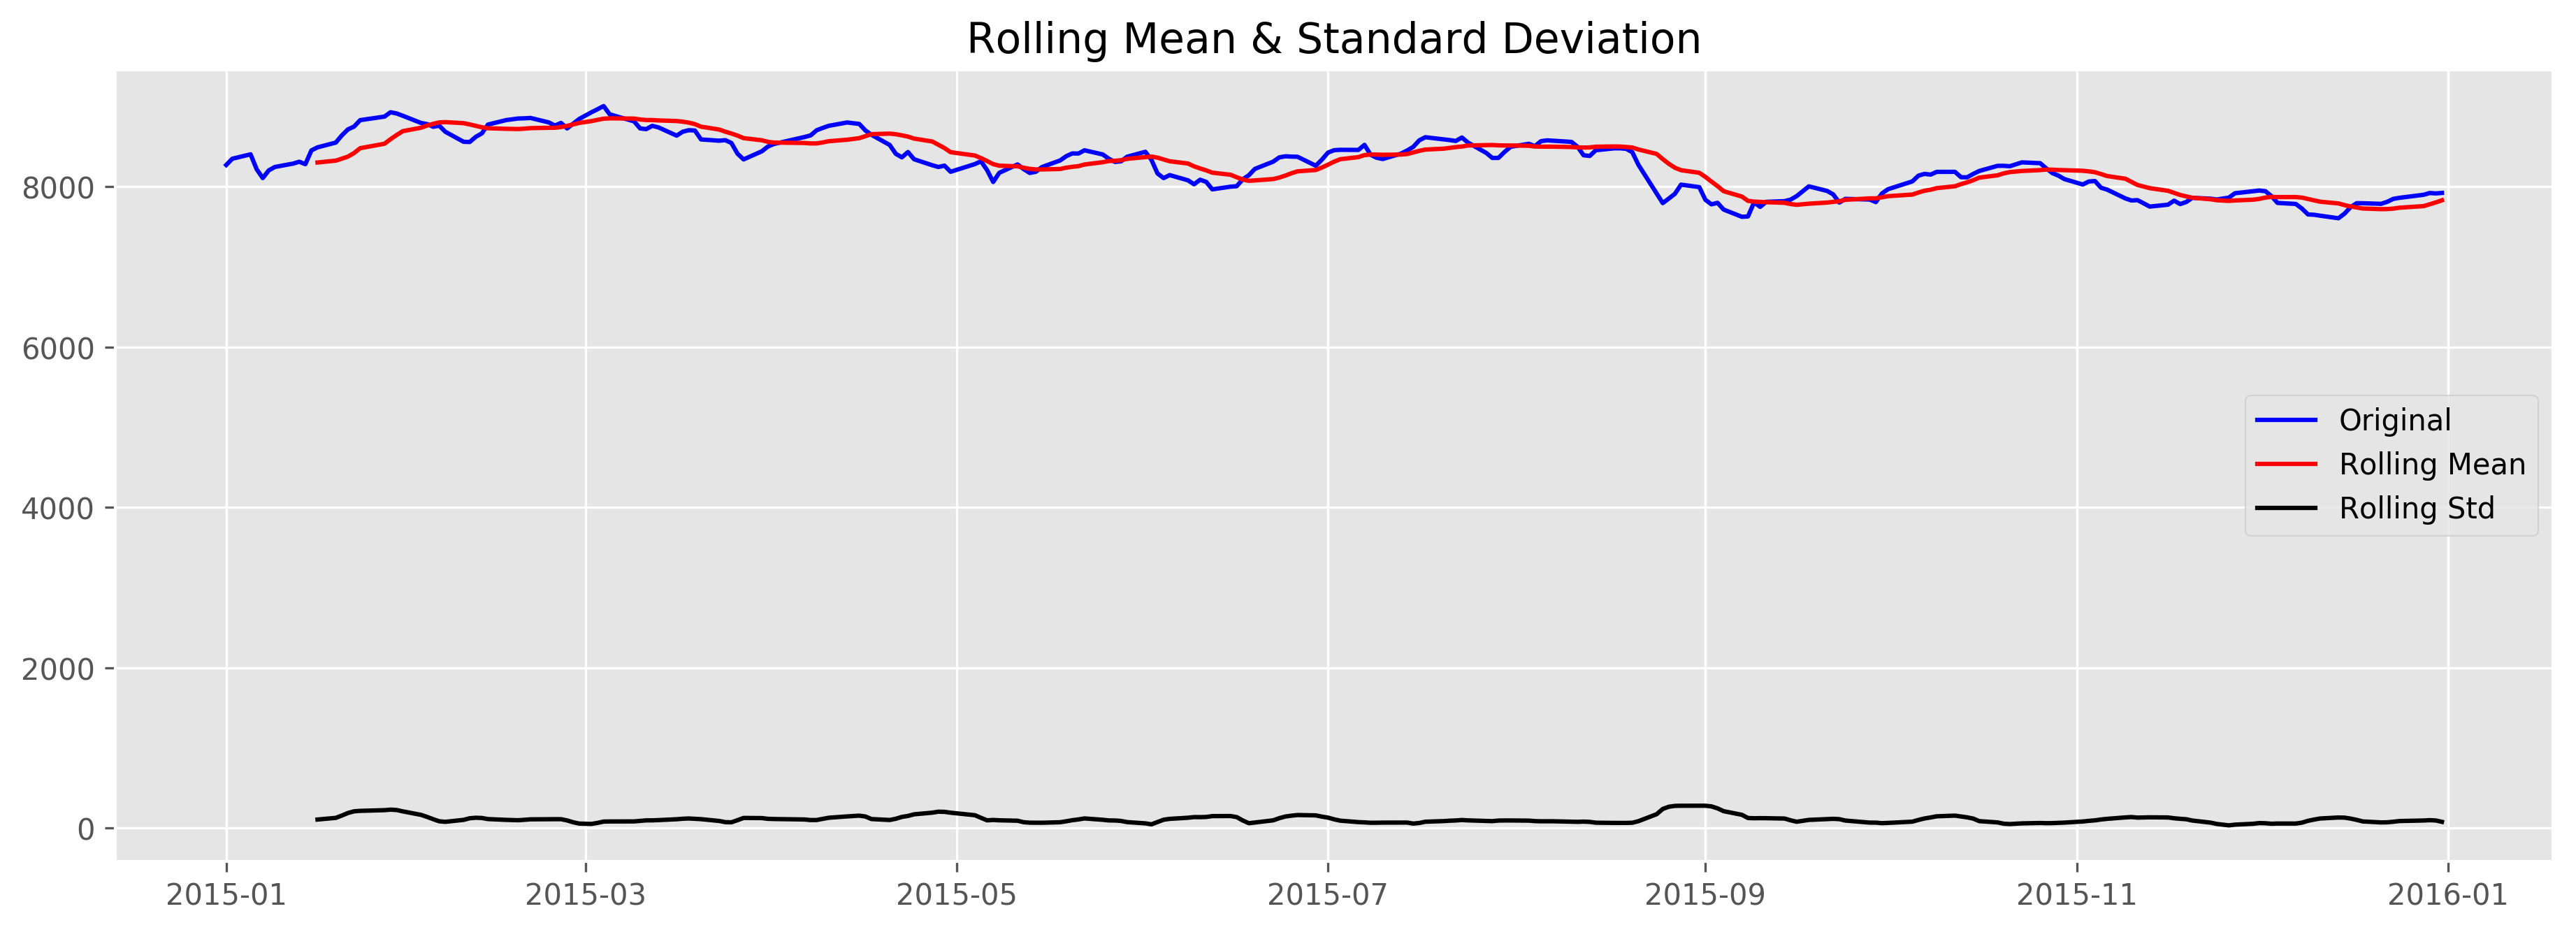

Results of Dickey-Fuller Test:
Test Statistic                  -1.737307
p-value                          0.412000
#Lags Used                       2.000000
Number of Observations Used    245.000000
Critical Value (1%)             -3.457326
Critical Value (5%)             -2.873410
Critical Value (10%)            -2.573096
dtype: float64


In [11]:
test_stationarity(nifty_data['Average'])

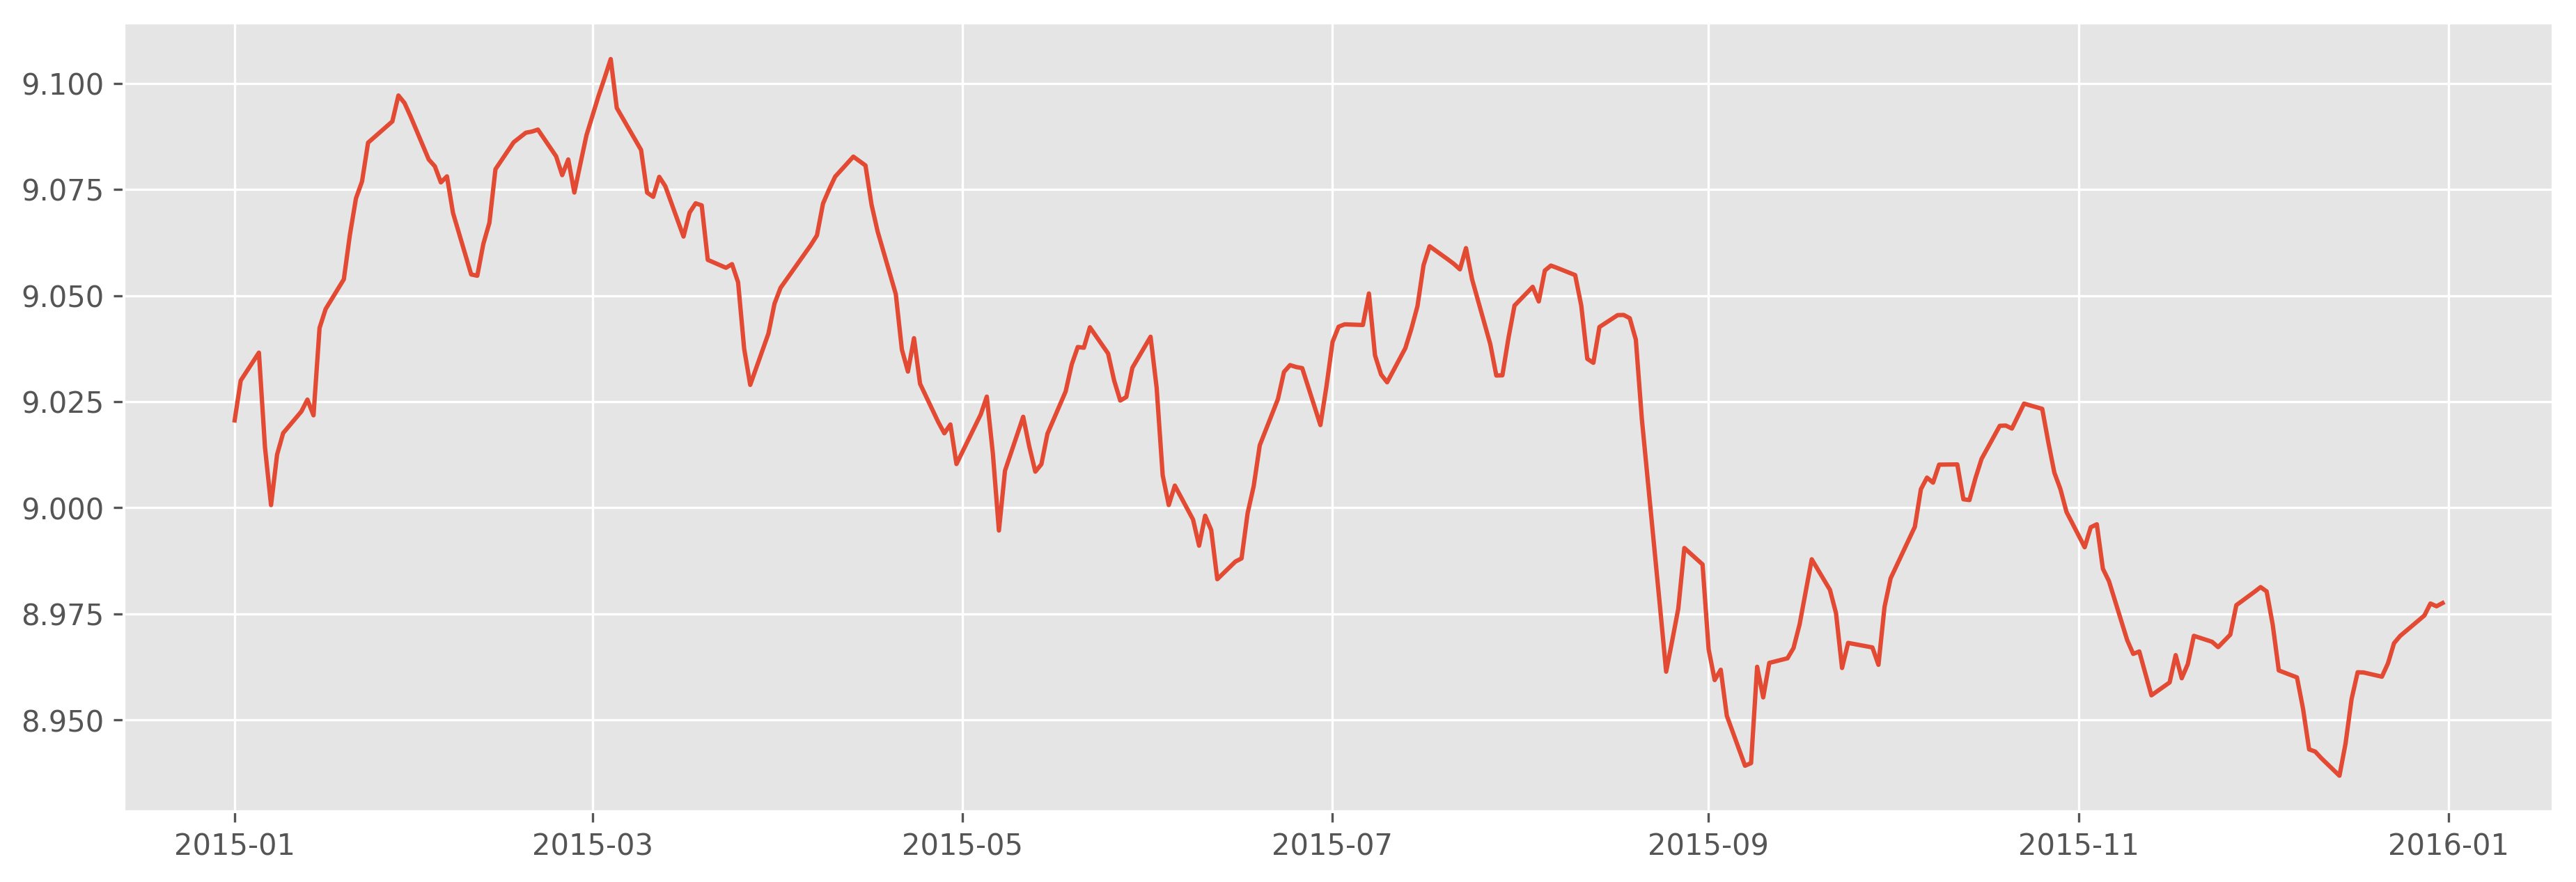

In [12]:
nifty_avg_log = np.log(nifty_data['Average'])
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log)
plt.show()

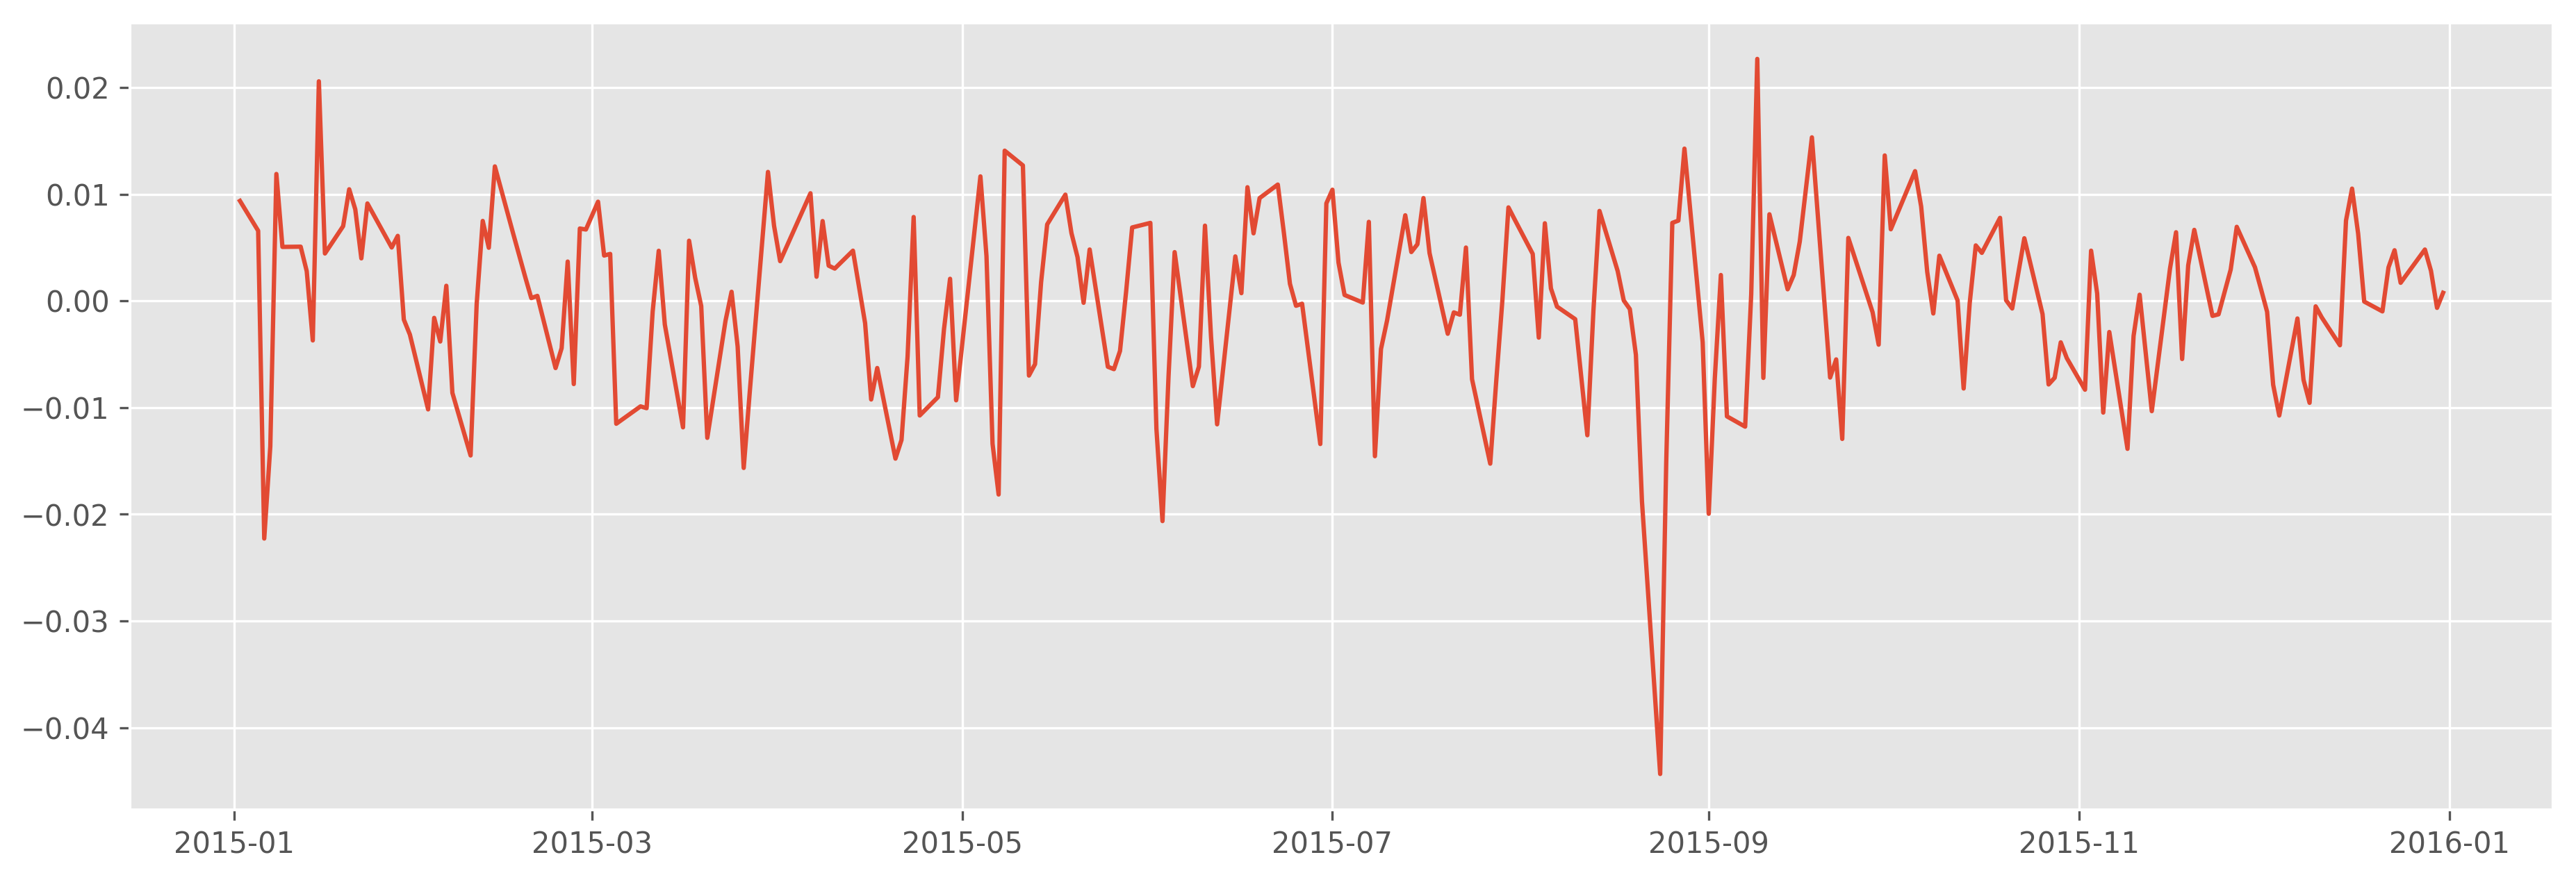

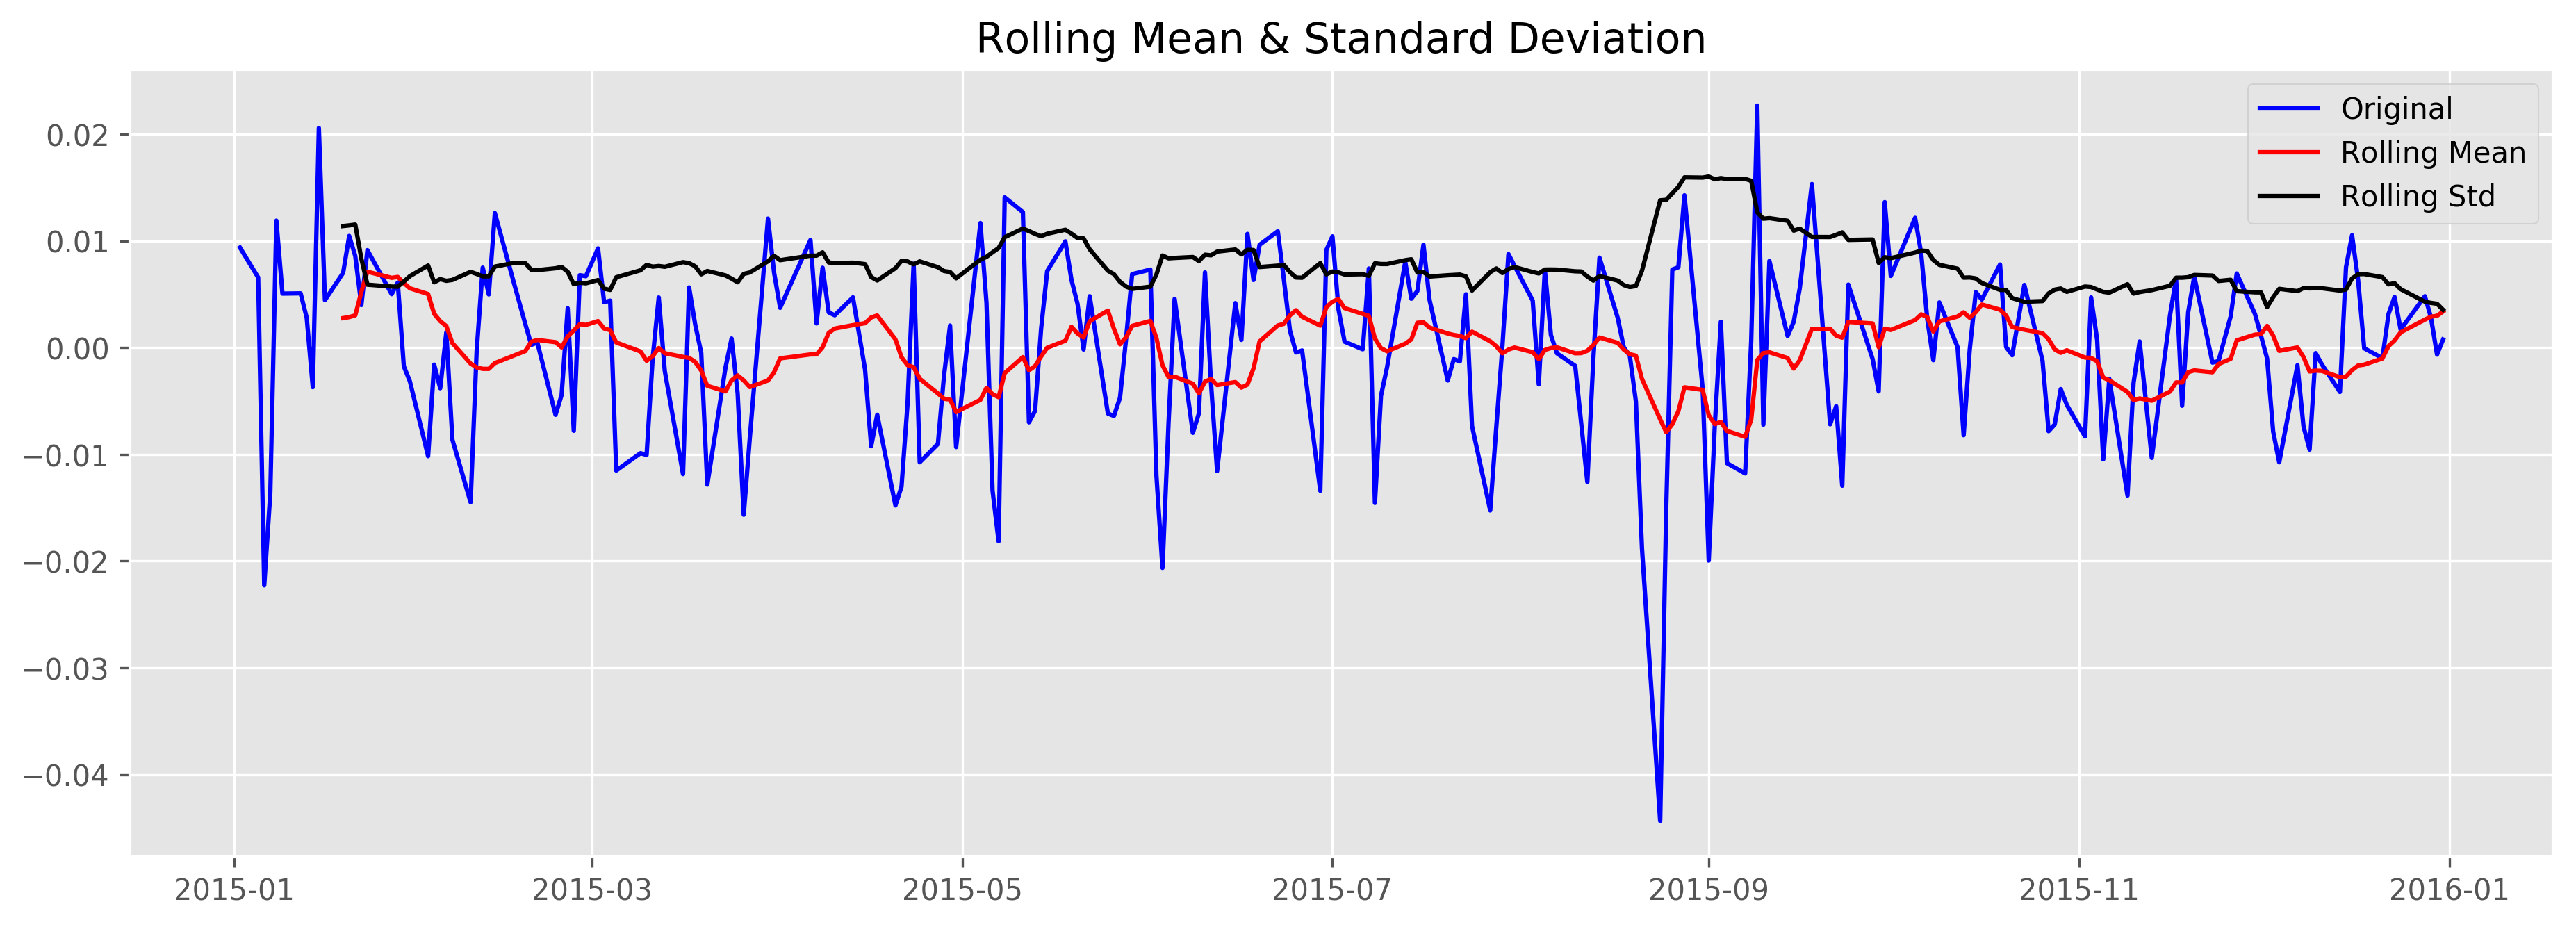

Results of Dickey-Fuller Test:
Test Statistic                -1.074352e+01
p-value                        2.778966e-19
#Lags Used                     1.000000e+00
Number of Observations Used    2.450000e+02
Critical Value (1%)           -3.457326e+00
Critical Value (5%)           -2.873410e+00
Critical Value (10%)          -2.573096e+00
dtype: float64


In [13]:
nifty_avg_log_diff = nifty_avg_log - nifty_avg_log.shift()
nifty_avg_log_diff.dropna(inplace=True)
plt.style.use('ggplot')
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log_diff)
nifty_avg_log_diff.dropna(inplace=True)
test_stationarity(nifty_avg_log_diff)

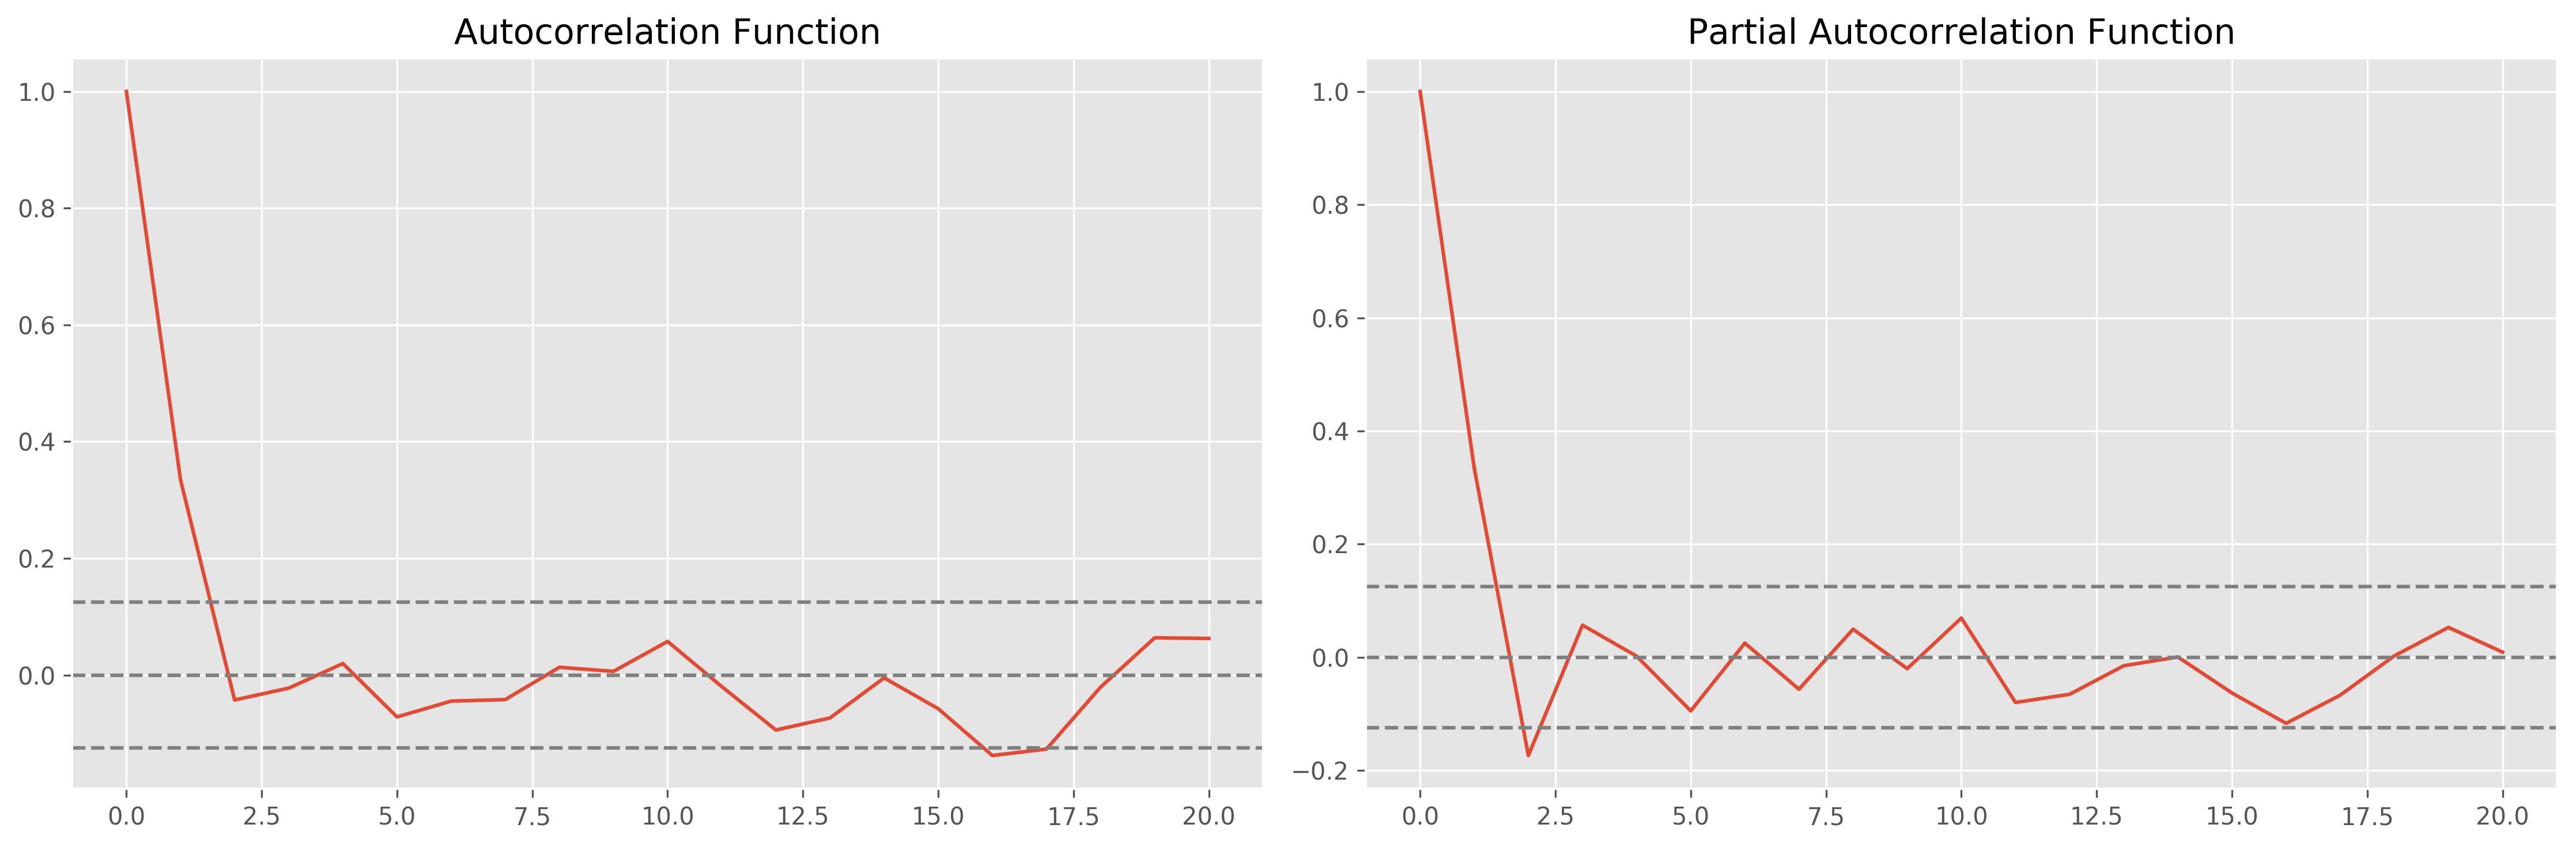

In [14]:
lag_acf = acf(nifty_avg_log_diff, nlags=20)
lag_pacf = pacf(nifty_avg_log_diff, nlags=20, method='ols')
plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(nifty_avg_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


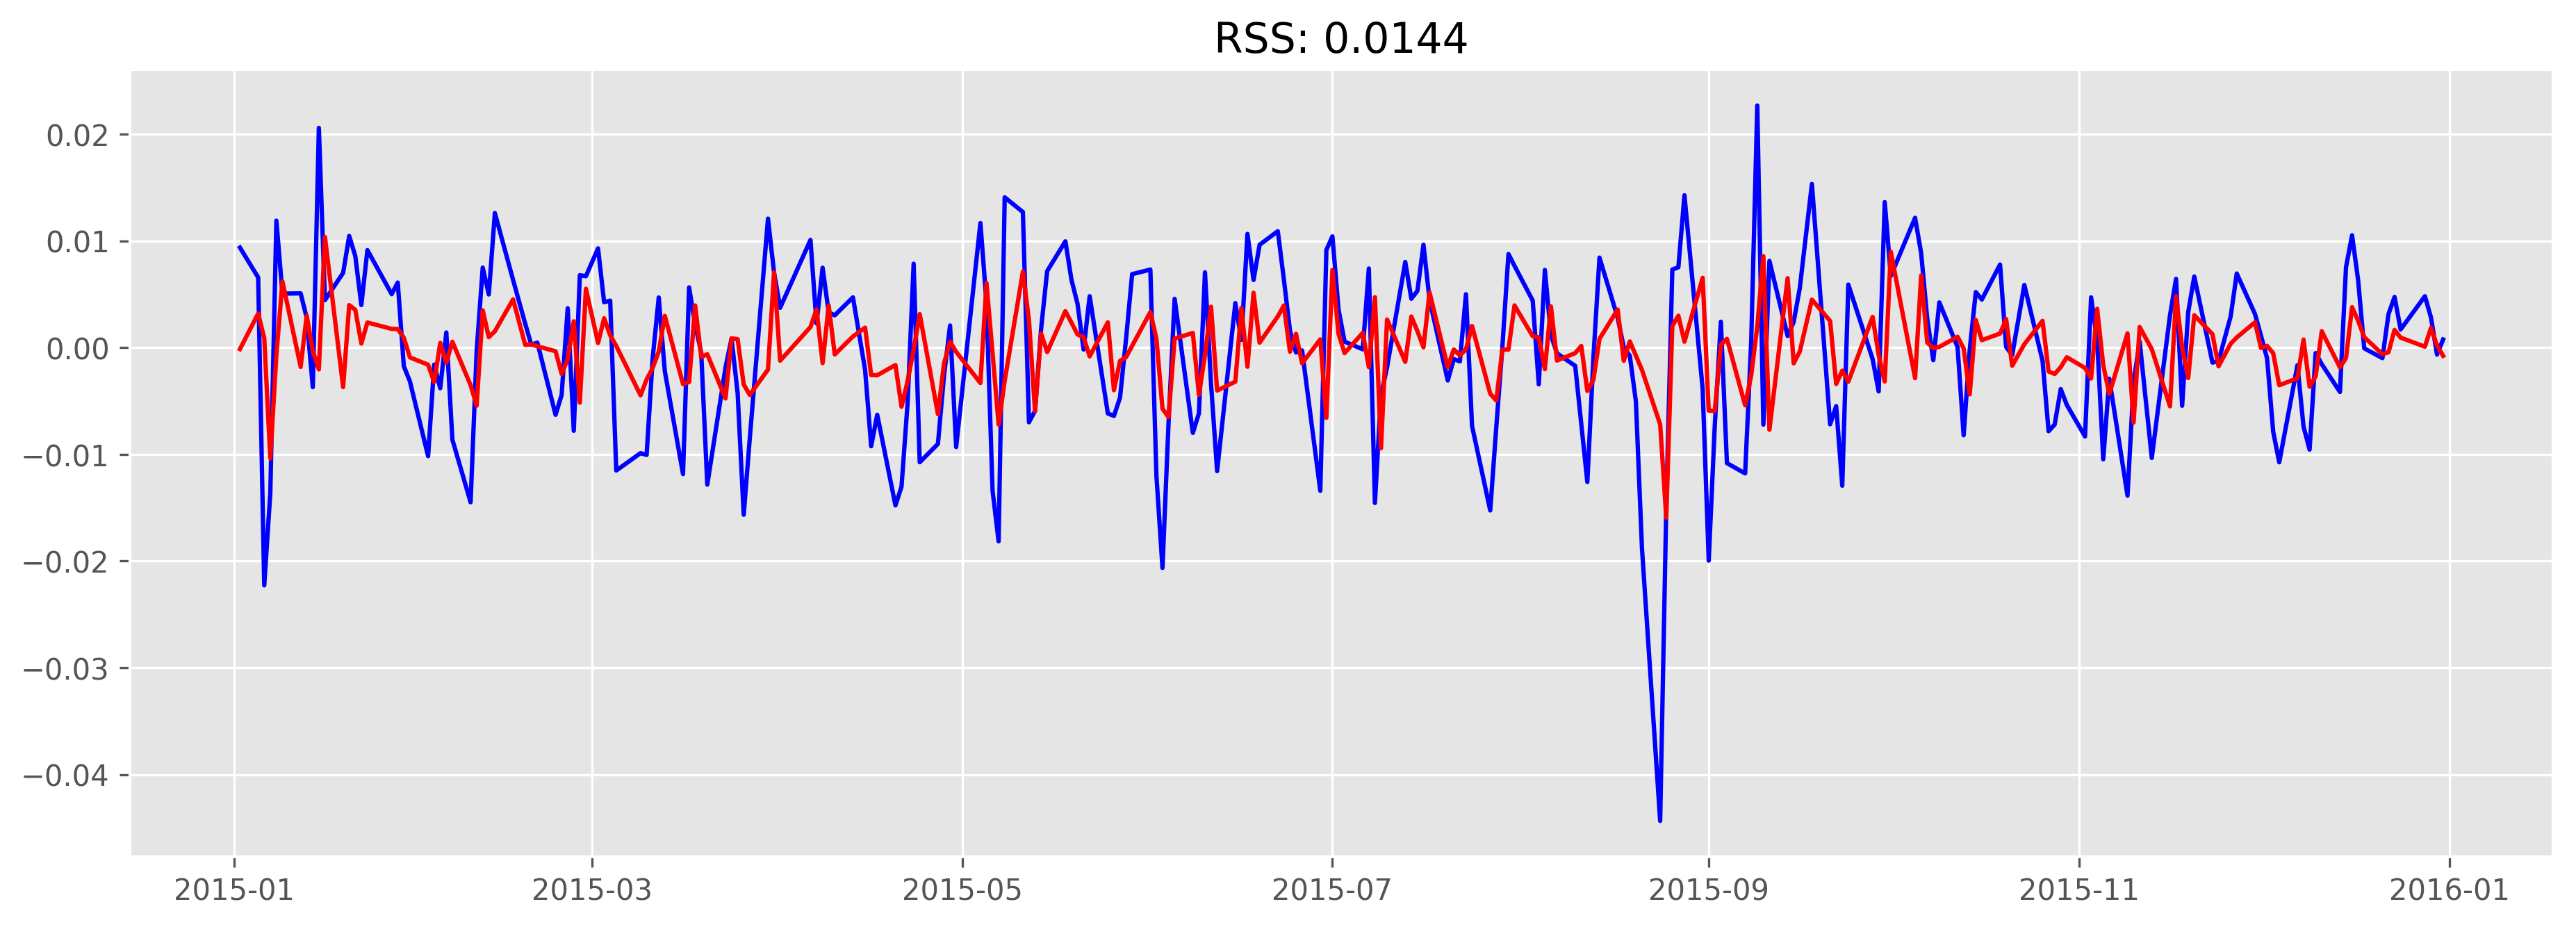

In [15]:
model = ARIMA(nifty_avg_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_avg_log_diff, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-nifty_avg_log_diff)**2))
plt.show()

In [16]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2015-01-02   -0.000136
2015-01-05    0.003196
2015-01-06    0.000900
2015-01-07   -0.010357
2015-01-08   -0.000701
dtype: float64


In [17]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2015-01-02   -0.000136
2015-01-05    0.003060
2015-01-06    0.003961
2015-01-07   -0.006397
2015-01-08   -0.007097
dtype: float64


In [18]:
predictions_ARIMA_log = pd.Series(nifty_avg_log.ix[0], index=nifty_avg_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2015-01-01    9.020598
2015-01-02    9.020463
2015-01-05    9.023659
2015-01-06    9.024559
2015-01-07    9.014202
dtype: float64

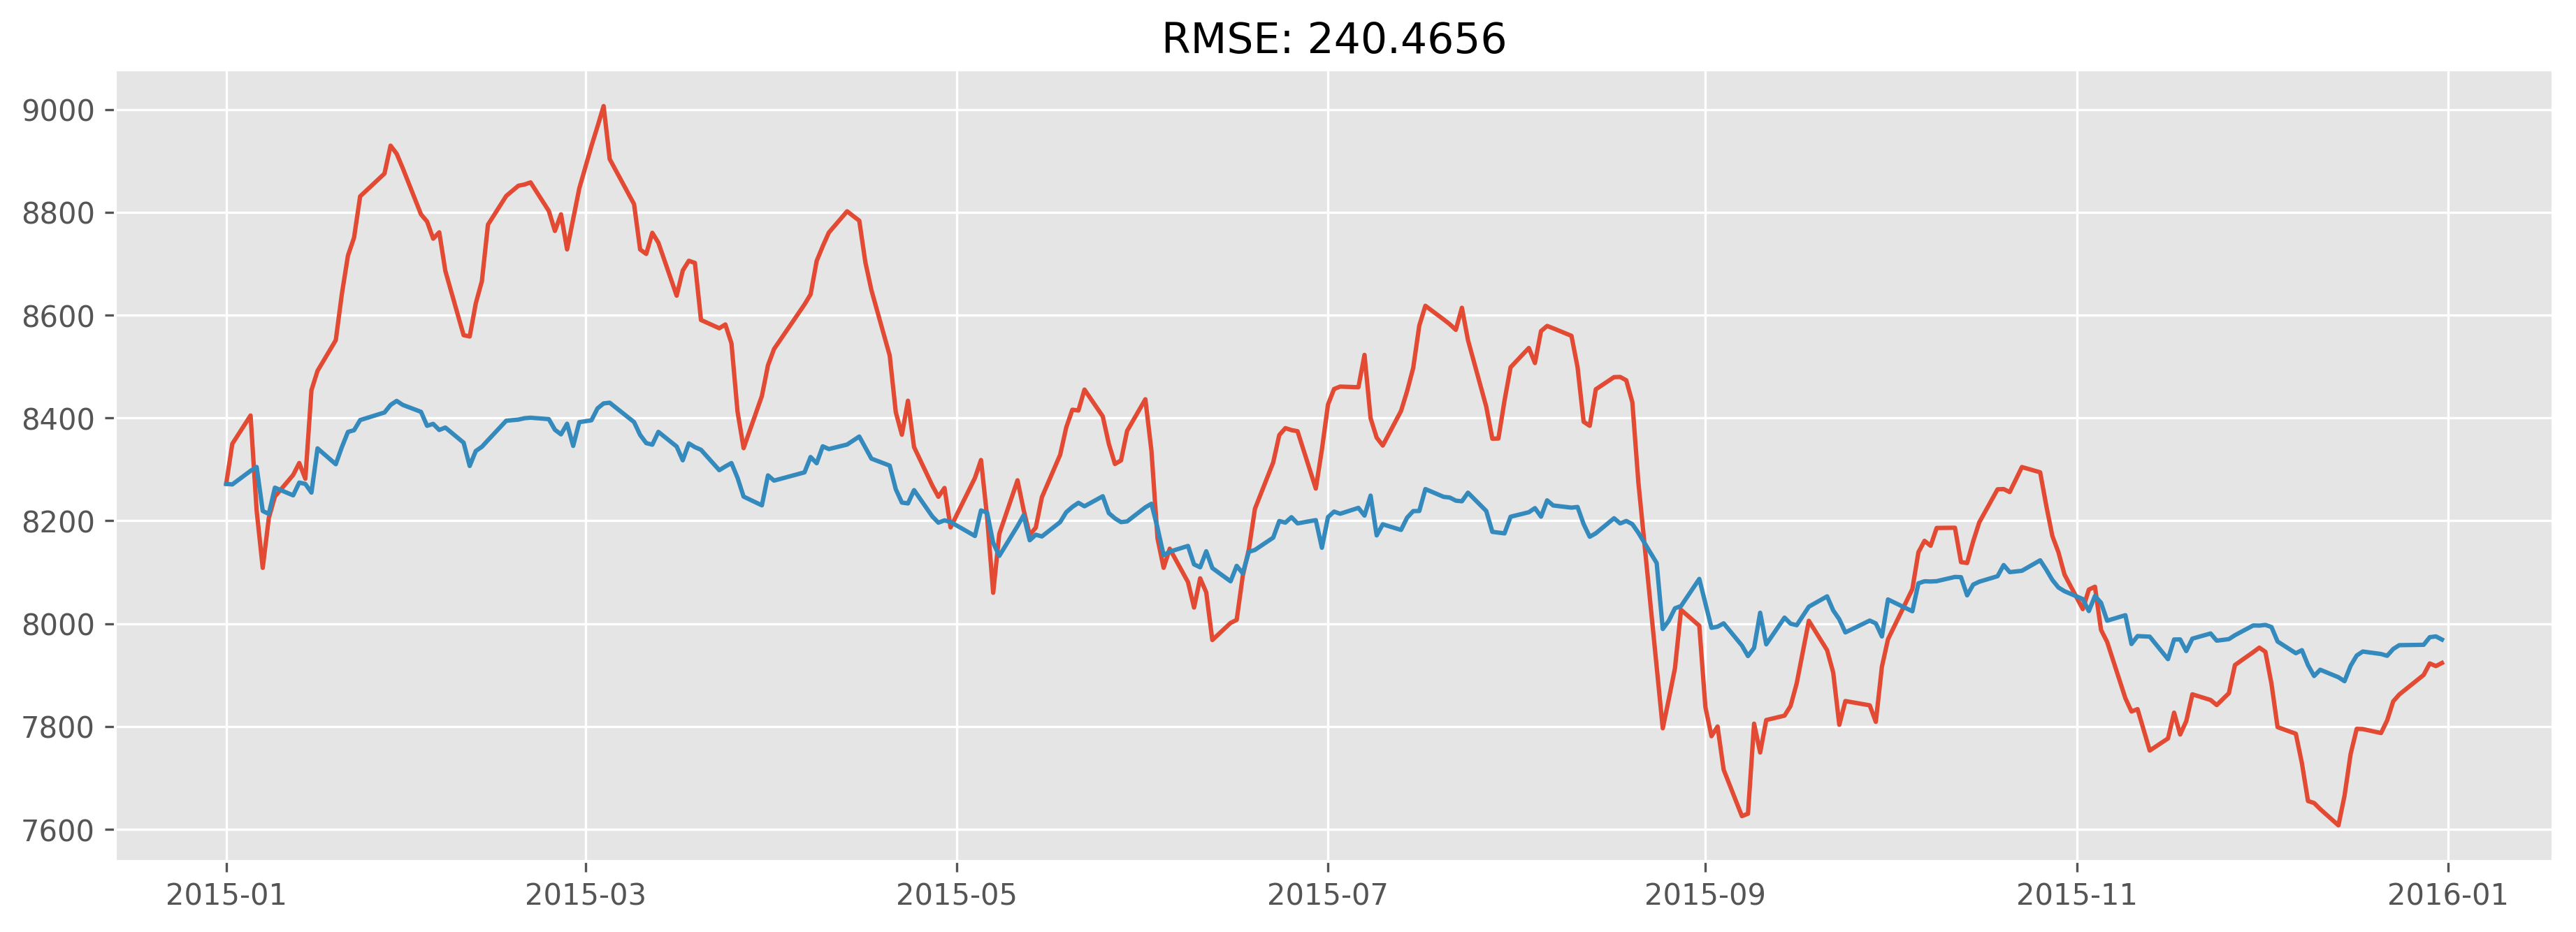

In [19]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.figure(figsize=(15, 5), dpi=300)
plt.plot(nifty_data['Average'])
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-nifty_data['Average'])**2)/len(nifty_data['Average'])))
plt.show()